# Group Members:


<font color='blue'>**PUT NAMES OF YOUR TEAM MEMBERS HERE**

*   Luca Franceschi - u199149
*   Jan Corcho - u188244

# Guide

In this lab we will solve several optimization problems which are constrained by one or more equalities and inequalities. We will solve them by using both the KKT optimality conditions and the Python function `scipy.optimize.minimize`.


For any doubts before and after the practice, you can contact your teacher:

Nneka Okolo - nnekamaureen.okolo@upf.edu

Pablo Arias - pablo.arias@upf.edu

Adriano Pastore - adriano.pastore@upf.edu

\\

**Deadlines**: See
[P101](https://calendar.google.com/calendar/embed?src=c_b679939a9db8a1d8cd9f01f62d373d173f76794e4137c40e793a8d2cb11708f8%40group.calendar.google.com&ctz=Europe%2FMadrid/),
[P102](https://calendar.google.com/calendar/embed?src=c_5a65338fe8c3ce7909e62bb6b572b1a61ff4ad3543b12f72468e1a16bca41bd0%40group.calendar.google.com&ctz=Europe%2FMadrid),
[P201](https://calendar.google.com/calendar/embed?src=c_58aa336a0c5d0a38b13dd4a38071e7d8f9a18f4306ffeef2e48276087c339163%40group.calendar.google.com&ctz=Europe%2FMadrid),
[P202](https://calendar.google.com/calendar/embed?src=c_dac1d492e1060f3cee35420a9c2ff0d345e89a002cc8c70fe74bf0b78bf99d37%40group.calendar.google.com&ctz=Europe%2FMadrid),


\\

**Submission instructions**

Complete the code and answer the questions below.

Export the notebook with the answers using the menu option File->Download .ipynb.

Rename exported notebook with the format **lastnameUid.ipynb** where lastname is the first surname of **Member 1** in the form and Uid is their UPF ID.

Submit your solution [here](https://forms.gle/AdYQwDEjAta1QaRY6) by the deadline. **Only one member needs to complete this step**.

You will receive an acknowledgement of receipt.

\\

**Grading**:

The evaluation is based on the report documenting your work (with figures), results, conclusions and the commented code together.

**Instructions for answering the questions.**

Questions are indicated in blue. Some questions require answers in the form of text, some others require completing code. See the examples below. *Please do not modify the notebook outside of these cells.*

<font color='blue'>**(QUESTION 42)** Based on what you know at this moment, answer these questions:
1. What are your favorite subjects?
2. What are your favourite hobbies?
</font>

<font color='red'>**ANSWER**</font>

1. I only like one subject: "Optimization Techniques."
1. I like writing equations $e^{i\pi} + 1 = 0$

<font color='blue'>**(QUESTION 43)** This is a coding question. There is no <font color='red'>**ANSWER**</font> cell. Instead, you should complete the code cell following the question. Typically, you'll find TODOs in the code indicating the places that you are expected to complete.
</font>

In [1]:
a = None     # TODO substitute the None by a nice number to print
print("The number a is {}".format(a))

The number a is None


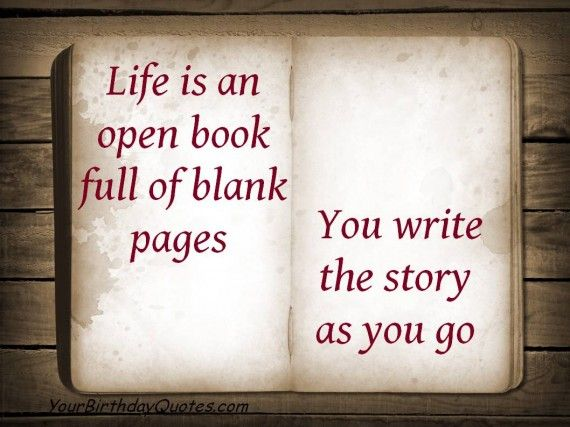

# Karush-Kuhn-Tucker (KKT) optimality conditions



Let first review some of the related concepts and methods. Consider the smooth functions
$f,c_1,\cdots,c_k,d_1,\ldots,d_r:\mathbb R^n\to\mathbb R$,
and the following constrained optimization problem $\mathcal P$:

$$
  (\mathcal P) \left\{
	\begin{array}{llll}
	\text{minimize }  & f(\mathbf x), &  & \\
	\text{subject to } & c_i(\mathbf x)\geq 0, & i = 1,...,k & \text{(inequality constraints),}\\
                     & d_j(\mathbf x) = 0, & j = 1,...,r & \text{(equality constraints).}
	\end{array}\right.
$$


Suppose that there is a  **minimum** $\mathbf x_0$ of $(\mathcal P)$.

It coincides with a **saddle point** $(\mathbf x_0,\boldsymbol{\lambda}^0,\boldsymbol{\nu}^0)$ of $\mathcal{L}(\mathbf x,\boldsymbol\lambda,\boldsymbol\nu)$, for
$$\mathcal{L}(\mathbf x,\boldsymbol\lambda,\boldsymbol\nu) = f(\mathbf x) - \sum_{i=1}^k \lambda_i c_i(\mathbf x) -  \sum_{j=1}^r \nu_j d_j(\mathbf x).$$

The method of Lagrange Multipliers is used to find the solution for optimization problems constrained to one or more equalities. When our constraints also have inequalities, we need to extend the method to the KKT conditions.


The *Karush-Kuhn-Tucker* (KKT) optimality conditions are

\begin{align*}
\nabla_x {\mathcal{L}}(\mathbf x_0, \boldsymbol\lambda^0) &= \mathbf 0 & \text{stationarity}\\
c_i(\mathbf x_0) &\geq 0 \quad  i = 1,...,k & \text{primal feasibility}\\
d_j(\mathbf x_0) &= 0 \quad j = 1,...,r& \text{primal feasibility}\\
\lambda^0_i &\geq 0 \quad i = 1,...,k & \text{dual feasibility} \\
\lambda^0_i c_i(x_0) &= 0 \quad i = 1,...,k& \text{complementary slackness}
\end{align*}



# Toy problem



Consider the function $f:\mathbb{R}^2\to\mathbb{R}$ defined by
$f(x_1,x_2)=x_2$, and the problem

$$
\left\{
\begin{array}{lll}
\text{minimize} & f(x_1,x_2) = x_2 \\
\text{subject  to} &   9 \geq (x_1-1)^2 + (x_2-2)^2 \\
                   &  x_2\leq 0
\end{array}
\right.
$$



<font color='blue'>**(QUESTION 1.1)**
Sketch the set of constraints of the problem and the level lines of the objective function.
</font>

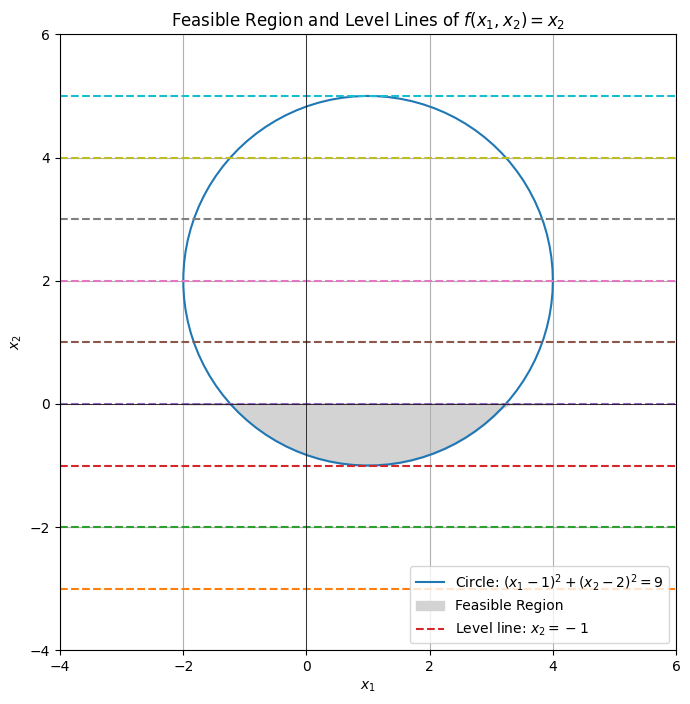

In [2]:
import numpy as np
import matplotlib.pyplot as plt

center = (1,2)
radius = 3 

theta = np.linspace(0, 2*np.pi, 100)

x_circle = center[0]+radius*np.cos(theta)
y_circle = center[1]+radius*np.sin(theta)

y_feasible = np.clip(y_circle, None, 0)

plt.figure(figsize=(8,8))

plt.plot(x_circle,y_circle,label='Circle: $(x_1 - 1)^2 + (x_2 - 2)^2 = 9$')

plt.fill_between(x_circle, y_feasible, color='lightgray', label='Feasible Region')

# Plot level lines for the objective function f(x1, x2) = x2
x_vals = np.linspace(-4, 6, 400)
for level in range(-3, 6):
    plt.plot(x_vals, [level]*len(x_vals), '--', label=f'Level line: $x_2 = {level}$' if level == -1 else None)

# Plot settings
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlim(-4, 6)
plt.ylim(-4, 6)
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Feasible Region and Level Lines of $f(x_1, x_2) = x_2$')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.grid(True)
plt.show()


<font color='red'>**ANSWER**</font>

<font color='blue'>**(QUESTION 1.2)**
From your sketch, guess the solution of the problem.
</font>

lc(f) = {(x1, x2) in R2 | f(x1, x2) = c}

<font color='red'>**ANSWER**</font>
From the graph we can see 

<font color='blue'>**(QUESTION 1.3)**
Find the solution using the function `scipy.optimize.minimize` from Python.
</font>

In [3]:
# write your code here - you can use several cells
import numpy as np
from scipy.optimize import minimize
import random 

# minimize(fun, x0, args=(), constraints=())
# put it like c_x >= 0 but we do not need the inequality only the function
# def objective(x: np.ndarray):
# solution = minimize(obj, x0, method,)

def objective(x: np.ndarray):
    return x[1]
    
def constraint1(x: np.ndarray):
    return 9 - (x[0]-1)**2 - (x[1]-2)**2

def constraint2(x:np.ndarray):
    return -x[1]

con1 = {'type': 'ineq', 'fun': constraint1}
con2 = {'type': 'ineq', 'fun': constraint2}
cons = ([con1, con2])

minimize(objective, np.array([0, 0]), method='SLSQP', constraints=cons)

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -1.000000005341867
       x: [ 1.000e+00 -1.000e+00]
     nit: 7
     jac: [ 0.000e+00  1.000e+00]
    nfev: 21
    njev: 7

<font color='blue'>**(QUESTION 1.4)**
Write the KKT optimality conditions and check
if the minimum satisfy these conditions. Find the
solution of the dual variable/s from the KKT conditions.
</font>

In [4]:
def lagrangian(x: np.ndarray, l1, l2, ob, c1, c2):
    return ob(x) - l1 * c1(x[0]) - l2 * c2(x[1])

<font color='red'>**ANSWER**</font>

**1. Stationarity**

$\nabla_{x} L(x, \lambda) = \begin{pmatrix}
2 \lambda_{1} (x_{1} - 1)\\
1 + 2 \lambda_{1} (x_{2} - 2) + \lambda_{2}
\end{pmatrix} = \begin{pmatrix} 0 \\ 0 \end{pmatrix} $

**2. Primal feasibility**

$ (x_1 -1)² + (x_1 - 2)² \leq 0 \\ x_2 \leq 0 $

**3. Dual feasibilty**

$ \lambda_1 \geq 0 , \lambda_2 \geq 0 $

**4. Complementary slackness**

$ \lambda_1 ((x_1 - 1)² + (x_2 -2)² - 9) = 0 \\$
$ \lambda_2 x_2 = 0 $



# Water-filling


This problem arises in Information Theory, in allocating power to a set of $n$ communication channels. Indeed, let us assume that we have a communication network and we would like to maximize the capacity or communication rate of the network.
Let a variable $x_i$ represent the capacity or transmitter power allocated to the $i$-th channel (connecting, e.g., two nodes of the communication network). Let $\alpha_i>0$ represent a certain level of noise. Now, $\ln (\alpha_i + x_i)$ gives the capacity or communication rate of the $i$-th channel. Assuming that the network has $n$ communication channels, the problem is to allocate a total power of one to the channels, in order to maximize the total communication rate:
$$
\sum_{i=1}^{n} \ln (\alpha_i + x_i)
$$
In other words, the convex optimization problem we have to consider is
$$
\left\{
	\begin{array}{ll}
	\text{minimize}  & - \displaystyle\sum_{i=0}^{n} \ln (\alpha_i + x_i)\\
	\text{subject to } & \mathbf x\geq 0 \\
	                   & \sum_{i=0}^{n}
										 x_i-1 = 0
	\end{array}
\right.
$$


<font color='blue'>**(QUESTION 2.1)**
Find the solution using the function `scipy.optimize.minimize` from Python of a network with four communication channels and the following two cases
1. where the noise is random and between 0 and 0.25
2. the noise is equal in each communication channel.

Comment each case.
</font>



In [5]:
# write your code here - you can use several cells

def objective(x: np.ndarray, alpha: np.ndarray):
    return - np.sum(np.log(alpha + x))

def constraint1(x: np.ndarray):
    return x

def constraint2(x: np.ndarray):
    return np.sum(x) - 1

con1 = {'type': 'ineq', 'fun': constraint1}
con2 = {'type': 'eq', 'fun': constraint2}
cons = ([con1, con2])

x0 = np.array([0, 0, 0, 0])

In [6]:
a = np.random.random(x0.shape)/4
minimize(objective, x0, args=a, method='SLSQP', constraints=cons)

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 3.9535202835855374
       x: [ 2.733e-01  3.126e-01  2.380e-01  1.761e-01]
     nit: 9
     jac: [-2.685e+00 -2.689e+00 -2.687e+00 -2.687e+00]
    nfev: 48
    njev: 9

In [7]:
a = np.array([1/x0.shape[0]]*x0.shape[0])
minimize(objective, x0, args=a, method='SLSQP', constraints=cons)

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 2.772588722239781
       x: [ 2.500e-01  2.500e-01  2.500e-01  2.500e-01]
     nit: 2
     jac: [-2.000e+00 -2.000e+00 -2.000e+00 -2.000e+00]
    nfev: 10
    njev: 2

<font color='red'>**ANSWER**</font>

<font color='blue'>**(QUESTION 2.2)**
Write  the  KKT  optimality  conditions  and  check  if  the  minimum  satisfy  these conditions for each case.  Find the solution of the dual variable/s from the KKT conditions
</font>



<font color='red'>**ANSWER**</font>

# Entropy maximization problem


We'll use the simplest version of entropy maximization for this lab. Entropy maximization is an important basic problem in information theory.

$$
\left\{
	\begin{array}{ll}
	\text{minimize} & f(\mathbf x) = \displaystyle\sum_{i=0}^{n}x_i \ln x_i\\
	\text{subject to} & \mathbf A\mathbf x\leq \mathbf b  \\
	                  & \sum_{i=0}^{n}
										x_i - 1 = 0
	\end{array}
\right.
$$

where $n=2$,
$$\mathbf A = \begin{pmatrix} 2 & 0 \\ 0 & 3 \end{pmatrix} \text{ and }
\mathbf b = \begin{pmatrix} 7  \\ 1 \end{pmatrix}.$$



<font color='blue'>**(QUESTION 3.1)**
Find the solution using the function `scipy.optimize.minimize` from Python.
</font>



In [8]:
# write your code here - you can use several cells
def objective(x: np.ndarray):
    return np.sum(x*np.log(x))
def constraint1(x: np.ndarray, A: np.ndarray, b: np.ndarray):
    return b - A @ x
def constraint2(x: np.ndarray):
    return np.sum(x) - 1

A = np.array([[2,0], [0,3]])
b = np.array([7,1]).T

con1 = {'type': 'ineq', 'fun': constraint1, 'args': (A, b)}
con2 = {'type': 'eq', 'fun': constraint2}
cons = ([con1, con2])

minimize(objective, np.array([0.00001, 0.00001]).T, method='SLSQP', constraints=cons)

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -0.6365141682948129
       x: [ 6.667e-01  3.333e-01]
     nit: 2
     jac: [ 5.945e-01 -9.861e-02]
    nfev: 6
    njev: 2

<font color='blue'>**(QUESTION 3.2)**
Write the KKT optimality conditions and check if the minimum 5. satisfy these conditions. Find the solution of the dual variable/s from the KKT conditions.
</font>



<font color='red'>**ANSWER**</font>